In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_rent = pd.read_csv('../../data/rent.csv', sep=';', encoding='utf-8')
df_rent

,list_id,type,first_publication_date,zipcode,district_id,price,charges_included,furnished,surface,price_m2,...,specificities_Construction ancienne,specificities_Construction récente,specificities_Cuisine ouverte,specificities_Cuisine équipée,specificities_Grenier,specificities_Plusieurs toilettes,specificities_Sous-sol,outside_access_Balcon,outside_access_Jardin,outside_access_Terrasse
0,2935092355,Appartement,2025-02-11 20:55:23,75017,3000120.0,500.0,1,1.0,9.0,55.555556,...,1.0,False,False,False,False,False,False,False,False,False
1,2934896366,Appartement,2025-02-11 15:40:22,75018,100465.0,500.0,1,1.0,11.0,45.454545,...,False,False,False,False,False,False,False,False,False,False
2,2915917705,Appartement,2025-01-08 21:48:00,75019,100457.0,500.0,1,1.0,7.0,71.428571,...,False,False,False,1.0,False,False,False,False,False,False
3,2930327536,Appartement,2025-02-03 09:13:00,75018,75118.0,500.0,1,1.0,10.0,50.000000,...,False,False,False,False,False,False,False,False,False,False
4,2933109540,Appartement,2025-02-08 16:20:09,75011,3000219.0,500.0,1,1.0,9.0,55.555556,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1189,2915282484,Appartement,2025-01-07 19:54:12,75017,3000193.0,1500.0,1,1.0,30.0,50.000000,...,False,False,False,False,False,False,False,False,False,False
1190,2915239385,Appartement,2025-01-07 18:36:38,75010,100517.0,1500.0,1,1.0,45.0,33.333333,...,1.0,False,False,False,False,False,False,False,False,False
1191,2911754446,Appartement,2025-01-01 20:54:27,75018,100465.0,1500.0,1,1.0,27.0,55.555556,...,False,False,False,False,False,False,False,False,False,False
1192,2908358055,Appartement,2024-12-25 16:02:00,75016,100478.0,1500.0,1,1.0,26.0,57.692308,...,False,False,False,False,False,False,False,False,False,1.0


In [2]:
for col in df_rent.columns:
    print(col)

list_id
type
first_publication_date
zipcode
district_id
price
charges_included
furnished
surface
price_m2
nb_rooms
nb_bedrooms
nb_bathrooms
floor_number
floor_building
elevator
parking
building_year
security_deposit
energy_rate
greenhouse_rate
owner_type
owner_company
latitude
longitude
url
specific_type_Appartement mansardé
specific_type_Autres
specific_type_Duplex
specific_type_Loft
specific_type_RDC surélevé
specificities_Accès PMR
specificities_Animaux autorisés
specificities_Avec garage ou place de parking
specificities_Baignoire
specificities_Cave
specificities_Chauffage au sol
specificities_Colocation possible
specificities_Construction ancienne
specificities_Construction récente
specificities_Cuisine ouverte
specificities_Cuisine équipée
specificities_Grenier
specificities_Plusieurs toilettes
specificities_Sous-sol
outside_access_Balcon
outside_access_Jardin
outside_access_Terrasse


<Axes: >

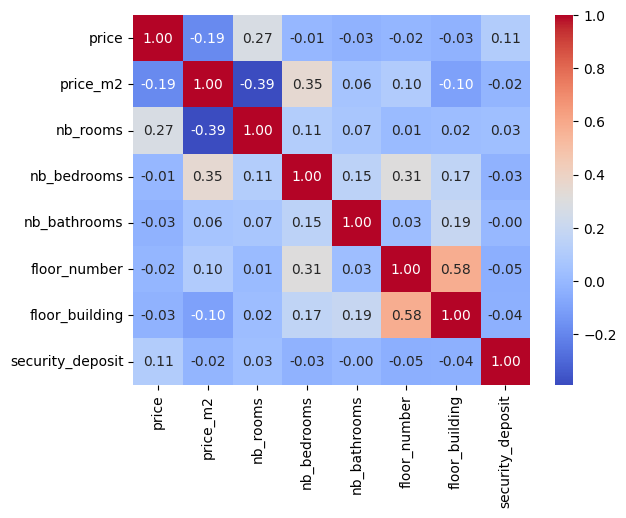

In [3]:
df_appart_info = df_rent[['price', 'price_m2', 'nb_rooms', 'nb_bedrooms', 'nb_bathrooms', 'floor_number', 'floor_building', 'security_deposit']].copy()

sns.heatmap(df_appart_info.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [4]:
df_rent_zipcode_grp = df_rent.groupby('zipcode').agg({'price': ['mean', 'std', 'count'], 'price_m2': ['mean', 'std', 'count']}).reset_index()
df_rent_zipcode_grp.columns = ['zipcode', 'price_mean', 'price_std', 'price_count', 'price_m2_mean', 'price_m2_std', 'price_m2_count']
df_rent_zipcode_grp

,zipcode,price_mean,price_std,price_count,price_m2_mean,price_m2_std,price_m2_count
0,75001,1107.500000,166.947929,10,46.951037,15.699903,10
1,75002,1115.684211,260.573737,19,53.122874,15.388075,17
2,75003,1094.600000,254.514067,20,49.801524,11.394746,20
3,75004,910.187500,265.016784,16,52.610881,10.628481,14
4,75005,1050.703704,276.894011,27,47.058197,8.337559,27
5,75006,1063.473684,210.095578,19,50.300798,14.021945,19
6,75007,984.500000,264.670301,20,56.431018,16.006629,17
7,75008,946.000000,269.243915,22,56.351400,16.080037,19
8,75009,1089.000000,287.373874,40,49.241887,12.682603,38
9,75010,1008.100000,281.096486,50,45.061490,12.476761,46


In [5]:
df_rent['owner_company'].nunique()

df_owner_company = df_rent.groupby('owner_company').agg({'price': ['mean', 'std', 'count'], 'price_m2': ['mean', 'std', 'count']}).reset_index()
df_owner_company.columns = ['owner_company', 'price_mean', 'price_std', 'price_count', 'price_m2_mean', 'price_m2_std', 'price_m2_count']
df_owner_company = df_owner_company.sort_values(by='price_m2_mean', ascending=False)
df_owner_company.head(10)

,owner_company,price_mean,price_std,price_count,price_m2_mean,price_m2_std,price_m2_count
41,Flexliving,1283.333333,104.083300,3,106.228070,28.294471,3
11,Aux Clefs des Sacres,1500.000000,NaN,1,100.000000,NaN,1
117,Orpi Bac St Germain,1100.000000,NaN,1,100.000000,NaN,1
132,SOCIETE DE GESTION LOCATIVE,950.000000,NaN,1,73.076923,NaN,1
93,MY PROPERTY,1300.000000,NaN,1,72.222222,NaN,1
34,E2F IMMO,500.000000,NaN,1,71.428571,NaN,1
139,YFRI pour CSO,1130.923810,180.437646,105,71.411916,21.217154,105
33,Dauphine Rive Gauche BAC,998.000000,138.592929,2,66.076923,33.832340,2
136,STUDAPART,1080.800000,212.640437,10,63.540368,22.685478,10
51,HPB HOTELS,950.000000,NaN,1,63.333333,NaN,1


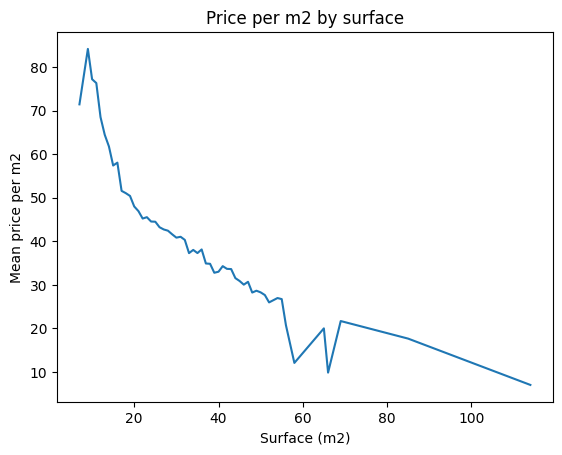

In [6]:

df_rent_surface_grp = df_rent.groupby('surface').agg({'price': ['mean', 'std', 'count'], 'price_m2': ['mean', 'std', 'count']}).reset_index()
df_rent_surface_grp.columns = ['surface', 'price_mean', 'price_std', 'price_count', 'price_m2_mean', 'price_m2_std', 'price_m2_count']
df_rent_surface_grp = df_rent_surface_grp.sort_values(by='surface', ascending=True)

sns.lineplot(data=df_rent_surface_grp, x='surface', y='price_m2_mean')
plt.title('Price per m2 by surface')
plt.xlabel('Surface (m2)')
plt.ylabel('Mean price per m2')
plt.show()

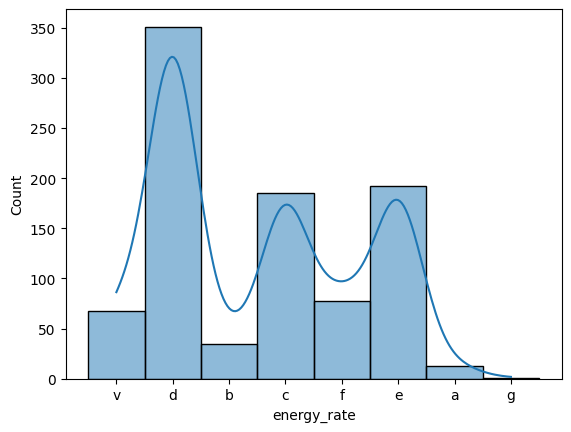

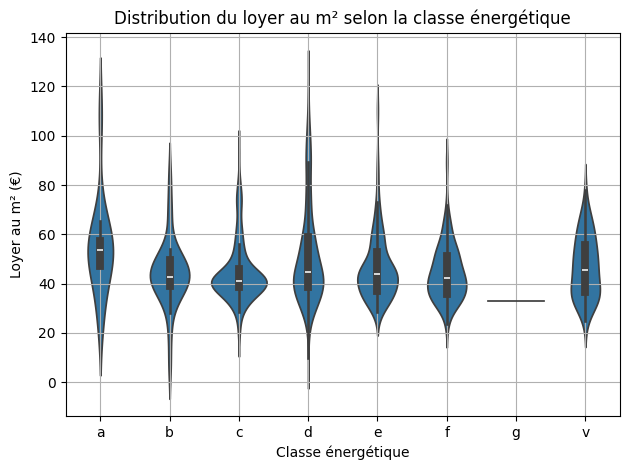

In [7]:

categories = sorted([x for x in df_rent[~df_rent['energy_rate'].isna()]['energy_rate'].unique()])

sns.histplot(data=df_rent, x='energy_rate', bins=10, kde=True, stat='count')
plt.show()


sns.violinplot(data=df_rent[~df_rent['price_m2'].isna()], x='energy_rate', y='price_m2', order=categories)

plt.title('Distribution du loyer au m² selon la classe énergétique')
plt.xlabel('Classe énergétique')
plt.ylabel('Loyer au m² (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

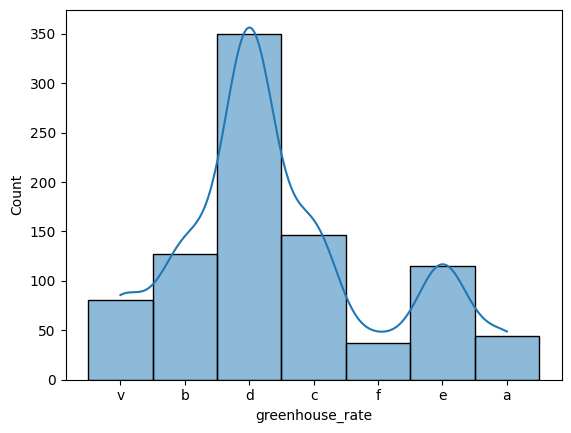

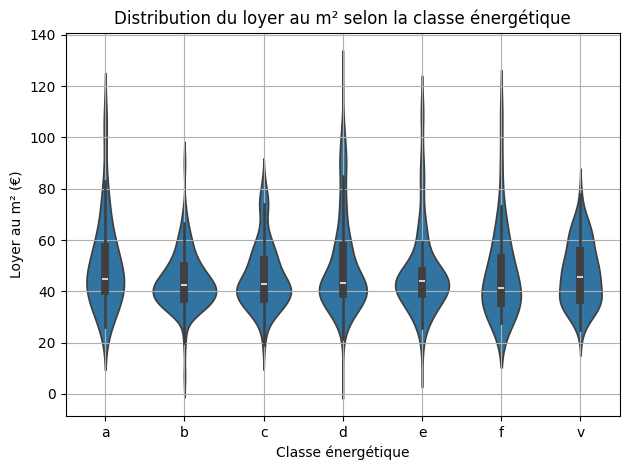

In [8]:
categories = sorted([x for x in df_rent[~df_rent['greenhouse_rate'].isna()]['greenhouse_rate'].unique()])

sns.histplot(data=df_rent, x='greenhouse_rate', bins=10, kde=True, stat='count')
plt.show()

sns.violinplot(data=df_rent[~df_rent['price_m2'].isna()], x='greenhouse_rate', y='price_m2', order=categories)

plt.title('Distribution du loyer au m² selon la classe énergétique')
plt.xlabel('Classe énergétique')
plt.ylabel('Loyer au m² (€)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
from scipy import stats

# compute pearson correlation coefficient and p-value
df_rent_nona = df_rent[['building_year', 'price_m2']].dropna()
corr, p_value = stats.pearsonr(df_rent_nona['building_year'], df_rent_nona['price_m2'])
print(f"Pearson correlation coefficient: {corr:.2f}, p-value: {p_value:.2e}")

Pearson correlation coefficient: -0.11, p-value: 2.53e-02


In [10]:
print(f"{df_rent[(df_rent['greenhouse_rate'] != df_rent['energy_rate']) & (~df_rent['greenhouse_rate'].isna())].shape[0] / df_rent.shape[0]:.2%} of the apartments have different energy and greenhouse rates.")
print(f"{df_rent[(df_rent['greenhouse_rate'] == df_rent['energy_rate']) & (~df_rent['greenhouse_rate'].isna())].shape[0] / df_rent.shape[0]:.2%} of the apartments have the same energy and greenhouse rates.")
print(f"{df_rent[(df_rent['greenhouse_rate'].isna()) & (~df_rent['energy_rate'].isna())].shape[0] / df_rent.shape[0]:.2%} of the apartments have only energy rate.")
print(f"{df_rent[(df_rent['greenhouse_rate'].isna()) & (df_rent['energy_rate'].isna())].shape[0] / df_rent.shape[0]:.2%} of the apartments have no energy and greenhouse rates.")
print(f"{df_rent[(~df_rent['greenhouse_rate'].isna()) & (df_rent['energy_rate'].isna())].shape[0] / df_rent.shape[0]:.2%} of the apartments have only greenhouse rate.")

33.84% of the apartments have different energy and greenhouse rates.
41.54% of the apartments have the same energy and greenhouse rates.
2.85% of the apartments have only energy rate.
21.78% of the apartments have no energy and greenhouse rates.
0.92% of the apartments have only greenhouse rate.


In [11]:
df_rent['greenhouse_rate'].unique()

array(['v', 'b', 'd', nan, 'c', 'f', 'e', 'a'], dtype=object)

In [12]:
mapping_ges = {
    'a' : 1,
    'b' : 2,
    'c' : 3,
    'd' : 4,
    'e' : 5,
    'f' : 6,
    'v' : -1,
	np.nan : -1
}

df_rent['greenhouse_rate'] = df_rent['greenhouse_rate'].map(mapping_ges)
df_rent['greenhouse_rate']

0      -1
1      -1
2       2
3       4
4      -1
       ..
1189    4
1190   -1
1191   -1
1192    5
1193    1
Name: greenhouse_rate, Length: 1194, dtype: int64

In [13]:
avg_ges = df_rent[df_rent['greenhouse_rate'] != -1]['greenhouse_rate'].mean()

df_rent['greenhouse_rate'] = df_rent['greenhouse_rate'].replace(-1, avg_ges)
df_rent['greenhouse_rate']


0       3.581197
1       3.581197
2       2.000000
3       4.000000
4       3.581197
          ...   
1189    4.000000
1190    3.581197
1191    3.581197
1192    5.000000
1193    1.000000
Name: greenhouse_rate, Length: 1194, dtype: float64

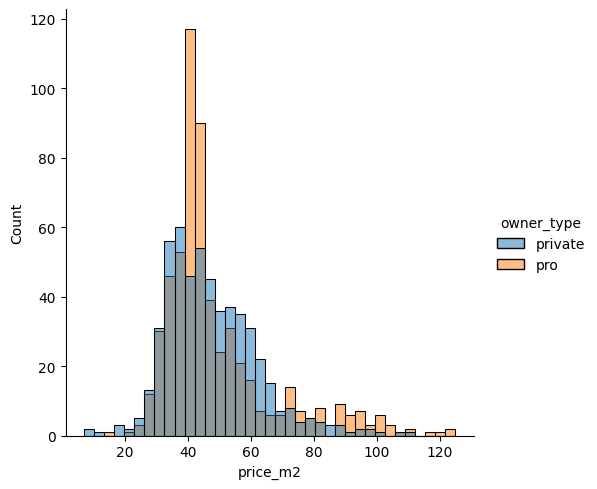

In [14]:
sns.displot(data=df_rent, x='price_m2', hue='owner_type')